In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.shape

(887, 8)

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
# objective to find relation between Survived, Pclass, Sex, Age
# it is a classification task

In [7]:
df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [8]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [10]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [11]:
# no NaN values so no need for imputation or dropping of columns...

In [12]:
df["Survived"].value_counts() # 0 is dead and 1 is survived

0    545
1    342
Name: Survived, dtype: int64

In [13]:
df["Pclass"].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
df["Sex"].value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [15]:
y = df.groupby("Pclass").sum()["Survived"] 

In [16]:
y  #here we can see that the percentage of survival of Pclass 1 passangers is high as total number of passengers was only 216

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [17]:
df.groupby("Pclass").sum()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Pclass,,,,,
1,136,8378.42,90,77,18177.4125
2,87,5495.83,74,70,3801.8417
3,119,12266.92,302,193,6675.6535


<AxesSubplot:xlabel='Sex', ylabel='count'>

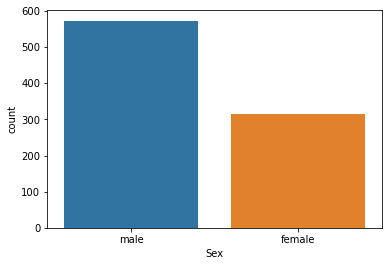

In [18]:
sns.countplot("Sex",data = df) 

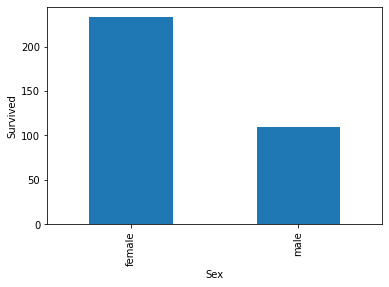

In [19]:
dfs = df.groupby("Sex").sum()["Survived"].plot.bar(ylabel = "Survived")

In [20]:
 dfs #females survived more

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

In [21]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [22]:
df.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


In [23]:
df["Survived"].corr(df["Pclass"])

-0.336528299945715

In [24]:
df["Survived"].corr(df["Age"]) # we can see that 

-0.059665126330250104

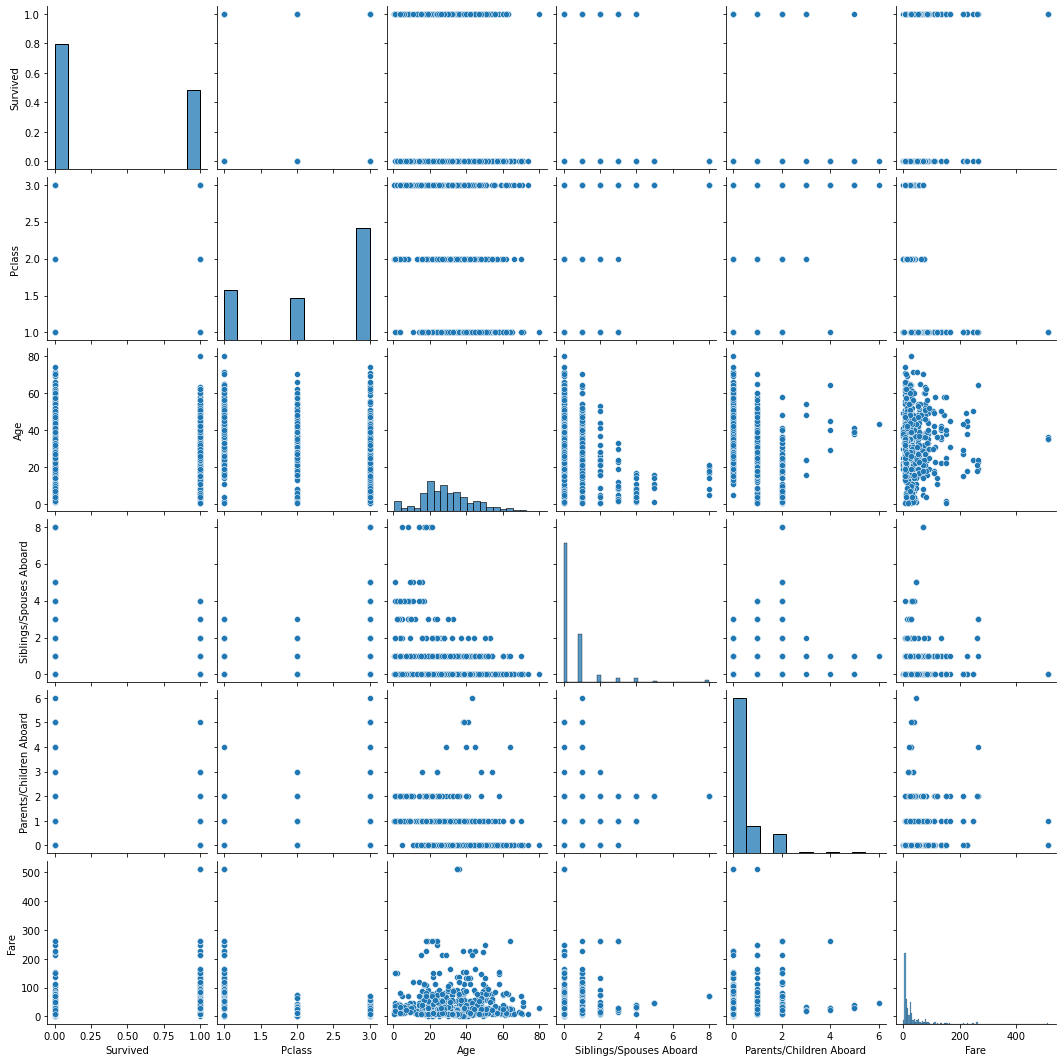

In [25]:
sns.pairplot(df)

In [26]:
# below is a plot to check which class passengers survived the most

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

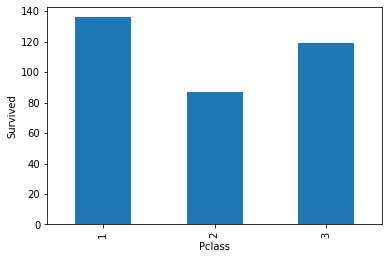

In [27]:
df.groupby("Pclass").sum()["Survived"].plot.bar(ylabel = "Survived") #class 1 passengers survivied most

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

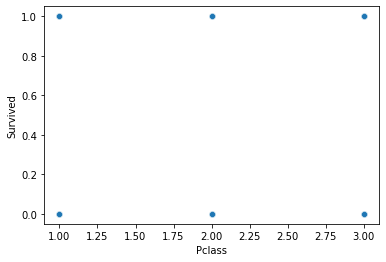

In [28]:
sns.scatterplot(x = "Pclass", y ="Survived",data = df )

In [29]:
df["Age"].value_counts()

22.00    39
28.00    37
18.00    36
21.00    34
24.00    34
         ..
0.92      1
23.50     1
36.50     1
55.50     1
74.00     1
Name: Age, Length: 89, dtype: int64

In [30]:
df.groupby("Age").sum()["Survived"]

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    0
70.50    0
71.00    0
74.00    0
80.00    1
Name: Survived, Length: 89, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Survived'>

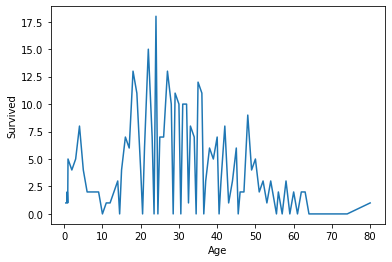

In [31]:
df.groupby("Age").sum()["Survived"].plot.line(ylabel = "Survived") # we can conclude that age group of 20 to 30 survived most

In [32]:
# to check for outliers...

<AxesSubplot:ylabel='Age'>

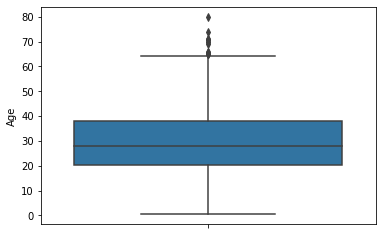

In [33]:
sns.boxplot( y = "Age",data = df) # age of 70 to 80 is outliers

In [34]:
df[df["Age"] > 65].count()["Age"] # we have 10 outlier values

10

In [35]:
# after this we have to treat the outlier values and the continue with our ml model
# survived can be affected by Pclass, age, sex...